# Clasificación para cáncer de mama
Se va a construir un modelo que sea capaz de identificar si una persona presenta un tumor benigno (que no se relaciona con el cáncer) o un tumor maligno (relacionado con el cáncer) de acuerdo a las características que presente la masa de tejido analizada. 

## Datos
Los datos utilizados durante el modelamiento son provenientes del Repositorio UCI Machine Learning https://archive.ics.uci.edu/ml/index.php

**La descripción de los datos es la siguiente**

    1.  Clump Thickess - Espesor del clumo (el espesor del grupo de células analizadas)
    2.  Uniformity of Cell Size - Uniformidad del tamaño de la célula (estima la uniformidad del tamaño de la célula)
    3.  Uniformity of Cell Shape - Uniformidad de la forma de la célula (estima la uniformidad de la forma de la célula)
    4.  Marginal Adhesion - Adhesión marginal (cuantificación de qué tanto tienden las células a mantenerse unidas fuera del           tejido epitelial)
    5.  Single Epithelial Cell Size - Tamaño de célula epitelial
    6.  Bare Nuclei - calcula la proporción del número de células que no se encuentran rodeadas por citoplasma con respecto a las que sí se encuentran rodeadas por citoplasma
    7.  Bland Chromatin - Categoriza la textura "uniforme" de fina a gruesa
    8.  Normal Nucleoli - Determina si los nucleolos son pequeños (apenas visibles) o alargados y más visibles
    9.  Mitoses - Describe el nivel de la actividad de reproducción celular
    10. Class - clase (2 = benigno; 4 = maligno)

## Preparación de herramientas

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Para elaboración de gráficas
import seaborn as sns

# Modelos a utilizar
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluación de modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

## Cargamos los datos

In [78]:
df = pd.read_csv('breast-cancer-wisconsin.csv')

In [79]:
df.shape

(699, 11)

In [80]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [81]:
df.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [82]:
df = df.drop('Sample code number', axis=1)

In [83]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [84]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

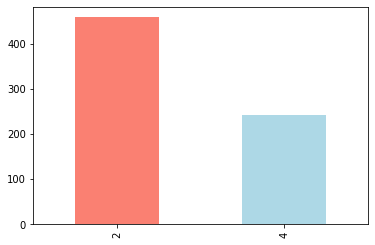

In [85]:
df['Class'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [87]:
df['Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

In [88]:
type(df['Bare Nuclei'][0])

str

In [89]:
conteo = 0
for i in df['Bare Nuclei']:
    if i.isdigit() != True:
        conteo += 1
print(conteo)

16


In [90]:
df = df[df['Bare Nuclei'].str.isdigit()]

In [91]:
df.shape

(683, 10)

In [92]:
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [93]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


In [98]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei']) 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB
